In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
import numpy as np


df = pd.read_excel(r'C:\Users\admin\Desktop\data from device2.xlsx',parse_dates=["Datetime"])
df.head(30)

,Datetime,device,co,humidity,light,lpg,motion,smoke,temp
0,2020-07-12 00:01:39.589,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.0
1,2020-07-12 00:01:44.468,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.0
2,2020-07-12 00:01:48.275,1c:bf:ce:15:ec:4d,0.004345,77.900002,True,0.006957,False,0.018440,27.0
3,2020-07-12 00:01:55.289,1c:bf:ce:15:ec:4d,0.004383,78.000000,True,0.007000,False,0.018563,27.0
4,2020-07-12 00:01:59.098,1c:bf:ce:15:ec:4d,0.004451,78.000000,True,0.007079,False,0.018786,27.0
5,2020-07-12 00:02:09.374,1c:bf:ce:15:ec:4d,0.004439,77.900002,True,0.007065,False,0.018747,27.0
6,2020-07-12 00:02:13.717,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.0
7,2020-07-12 00:02:19.666,1c:bf:ce:15:ec:4d,0.004381,77.900002,True,0.006998,False,0.018556,27.0
8,2020-07-12 00:02:25.083,1c:bf:ce:15:ec:4d,0.004344,78.300003,True,0.006955,False,0.018433,27.0
9,2020-07-12 00:02:32.101,1c:bf:ce:15:ec:4d,0.004391,78.599998,True,0.007009,False,0.018589,27.0


In [1]:
#df_temp = df[df.temp]
#df_temp
#df.describe()

#df_Denamrk.index = pd.to_datetime(df_Denamrk.dt)

In [4]:
df.info

<bound method DataFrame.info of                       Datetime             device        co   humidity  light  \
0      2020-07-12 00:01:39.589  1c:bf:ce:15:ec:4d  0.004403  76.800003   True   
1      2020-07-12 00:01:44.468  1c:bf:ce:15:ec:4d  0.004391  77.900002   True   
2      2020-07-12 00:01:48.275  1c:bf:ce:15:ec:4d  0.004345  77.900002   True   
3      2020-07-12 00:01:55.289  1c:bf:ce:15:ec:4d  0.004383  78.000000   True   
4      2020-07-12 00:01:59.098  1c:bf:ce:15:ec:4d  0.004451  78.000000   True   
...                        ...                ...       ...        ...    ...   
105913 2020-07-20 00:03:09.091  1c:bf:ce:15:ec:4d  0.004524  75.900002   True   
105914 2020-07-20 00:03:20.460  1c:bf:ce:15:ec:4d  0.004532  75.900002   True   
105915 2020-07-20 00:03:24.270  1c:bf:ce:15:ec:4d  0.004532  75.900002   True   
105916 2020-07-20 00:03:30.756  1c:bf:ce:15:ec:4d  0.004553  75.800003   True   
105917 2020-07-20 00:03:36.168  1c:bf:ce:15:ec:4d  0.004540  75.699997   True

In [5]:
df.isnull().sum()

Datetime    0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

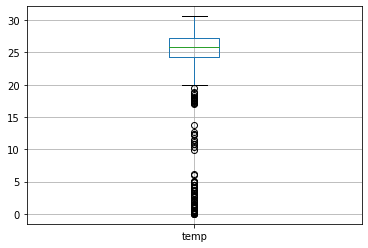

In [6]:
df.boxplot(column=["temp"])

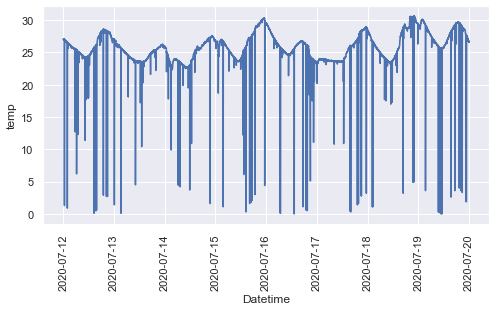

In [10]:
sns.set(rc={'figure.figsize':(8,4)})
plt.xticks(rotation=90)
sns.lineplot(x=df['Datetime'],y=df['temp'])
plt.show()

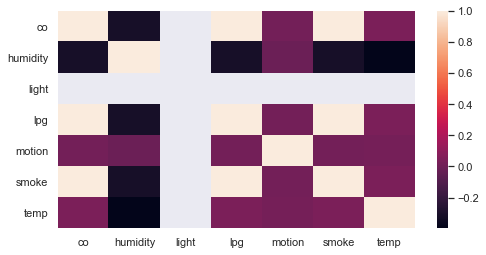

In [11]:
corr=df.corr()
ax=sns.heatmap(corr)

In [25]:
display(df.dtypes)

Datetime    datetime64[ns]
device              object
co                 float64
humidity           float64
light                 bool
lpg                float64
motion                bool
smoke              float64
temp               float64
dtype: object

In [1]:
#df['temp'] = df['temp'].astype(int)
df.index.is_unique

NameError: name 'df' is not defined

In [115]:
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [63]:
display(df.dtypes)

Datetime    datetime64[ns]
device              object
co                 float64
humidity           float64
light                 bool
lpg                float64
motion                bool
smoke              float64
temp                 int32
dtype: object

In [34]:
#df1 = df.copy()
df = df.dropna()
#df_Denamrk = TempData[TempData.Country == "Denmark"]
df1 = df['temp']

#type(df1)
df1.index = pd.to_datetime(df.Datetime)
#df_Denamrk.index = pd.to_datetime(df_Denamrk.dt)
#df1.set_index(df.Datetime, inplace=True)
#df1['temp']
df1
df1.describe()

count    105918.000000
mean         26.025511
std           2.026427
min           0.000000
25%          24.299999
50%          25.900000
75%          27.299999
max          30.600000
Name: temp, dtype: float64

In [16]:
ts = df1
ts

Datetime
2020-07-12 00:01:39.589    27.0
2020-07-12 00:01:44.468    27.0
2020-07-12 00:01:48.275    27.0
2020-07-12 00:01:55.289    27.0
2020-07-12 00:01:59.098    27.0
                           ... 
2020-07-20 00:03:09.091    26.6
2020-07-20 00:03:20.460    26.6
2020-07-20 00:03:24.270    26.6
2020-07-20 00:03:30.756    26.6
2020-07-20 00:03:36.168    26.6
Name: temp, Length: 105918, dtype: float64

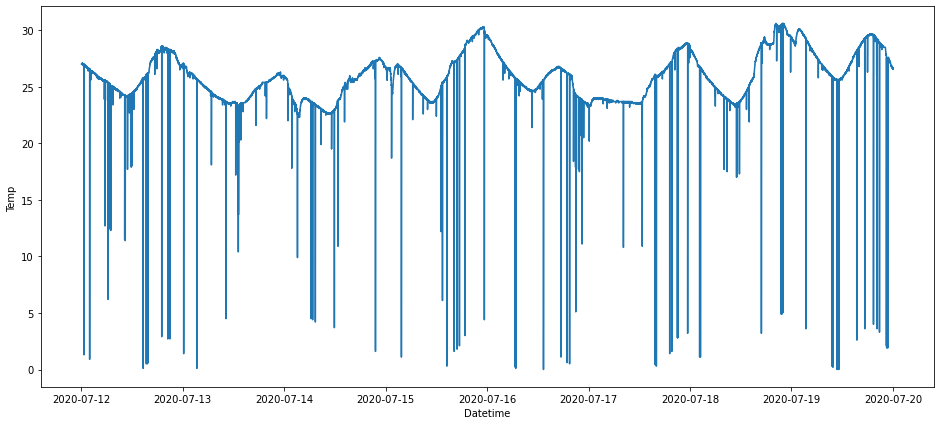

In [49]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Temp ')
ax1.plot(ts)


In [105]:
adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.7073202684431577
p-value: 0.07278008644820742
Critial Values:
   1%, -3.430411774010953
Critial Values:
   5%, -2.8615673031616877
Critial Values:
   10%, -2.5667845325146637


In [8]:
#newmodel = ARMA(ts,order=(1,1))
#results = newmodel.fit()

#predictions = results.predict('12-07-2020', '20-07-2020')
#newmodel = ARMA(ts,order=(1,1))
#results = newmodel.fit()
#mod = ARMA(ts,order=(1,1))
#results = mod.fit()
#print('ARMA{} - AIC:{}'.format(results.aic))

#predictions = results.predict('07/12/2020', '20/12/2020')

In [3]:
df2 = df['humidity']
df2.index = pd.to_datetime(df.Datetime)
df2

Datetime
2020-07-12 00:01:39.589    76.800003
2020-07-12 00:01:44.468    77.900002
2020-07-12 00:01:48.275    77.900002
2020-07-12 00:01:55.289    78.000000
2020-07-12 00:01:59.098    78.000000
                             ...    
2020-07-20 00:03:09.091    75.900002
2020-07-20 00:03:20.460    75.900002
2020-07-20 00:03:24.270    75.900002
2020-07-20 00:03:30.756    75.800003
2020-07-20 00:03:36.168    75.699997
Name: humidity, Length: 105918, dtype: float64

In [4]:
ts1 = df2
ts1

Datetime
2020-07-12 00:01:39.589    76.800003
2020-07-12 00:01:44.468    77.900002
2020-07-12 00:01:48.275    77.900002
2020-07-12 00:01:55.289    78.000000
2020-07-12 00:01:59.098    78.000000
                             ...    
2020-07-20 00:03:09.091    75.900002
2020-07-20 00:03:20.460    75.900002
2020-07-20 00:03:24.270    75.900002
2020-07-20 00:03:30.756    75.800003
2020-07-20 00:03:36.168    75.699997
Name: humidity, Length: 105918, dtype: float64

In [100]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

NameError: name 'predictions' is not defined

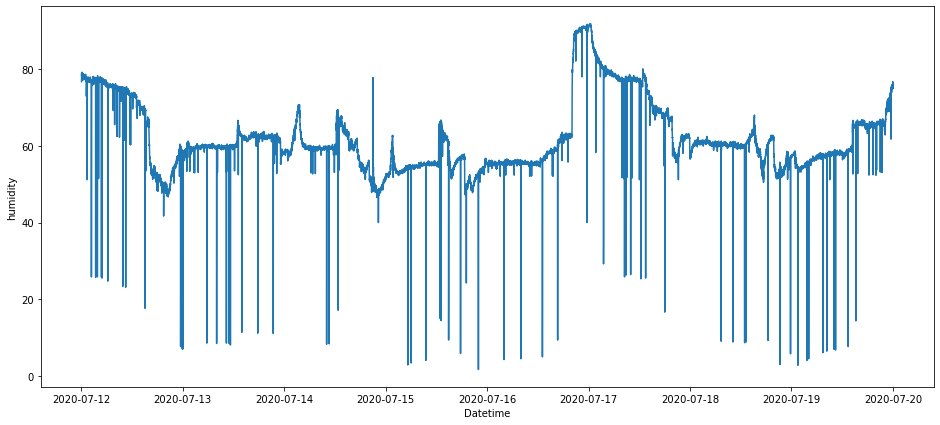

In [5]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Datetime')
ax1.set_ylabel('humidity')
ax1.plot(ts1)


In [71]:
actuals = df1['12/07/2020': '20/07/2020'][0:13]
actuals

Series([], Name: temp, dtype: int32)

In [6]:
adfuller_result = adfuller(ts1, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.3041158406009172
p-value: 0.17064396701606
Critial Values:
   1%, -3.430411765842291
Critial Values:
   5%, -2.8615672995513024
Critial Values:
   10%, -2.5667845305929755


In [106]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(ts,order=parameters)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - AIC:455811.8202566837
ARMA(0, 1) - AIC:380568.27440218977
ARMA(0, 2) - AIC:343110.11603965587
ARMA(0, 3) - AIC:319374.61961277184
ARMA(1, 0) - AIC:271908.8871035464
ARMA(2, 0) - AIC:244693.355416343
ARMA(3, 0) - AIC:232274.67519178212


In [109]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

NameError: name 'predictions' is not defined

In [110]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [123]:
#ARMAmodel = ARMA(df, order=(1, 1))
#ARmodel_fit = ARMAmodel.fit(disp=False)
np.asarray(df)


array([[Timestamp('2020-07-12 00:01:39.589000'), '1c:bf:ce:15:ec:4d',
        0.00440302682969968, ..., False, 0.0186282253770188, 27.0],
       [Timestamp('2020-07-12 00:01:44.468000'), '1c:bf:ce:15:ec:4d',
        0.00439100395458335, ..., False, 0.0185889075400507, 27.0],
       [Timestamp('2020-07-12 00:01:48.275000'), '1c:bf:ce:15:ec:4d',
        0.00434547135957324, ..., False, 0.0184397819021168, 27.0],
       ...,
       [Timestamp('2020-07-20 00:03:24.270000'), '1c:bf:ce:15:ec:4d',
        0.00453206819936983, ..., False, 0.0190487037791198,
        26.6000003814697],
       [Timestamp('2020-07-20 00:03:30.756000'), '1c:bf:ce:15:ec:4d',
        0.00455321359072067, ..., False, 0.0191173443798619,
        26.6000003814697],
       [Timestamp('2020-07-20 00:03:36.168000'), '1c:bf:ce:15:ec:4d',
        0.00454046174609514, ..., False, 0.019075958981004,
        26.6000003814697]], dtype=object)

In [124]:
ypredicted = ARmodel_fit.predict(len(df), len(df)+2)
print(ypredicted)

NameError: name 'ARmodel_fit' is not defined

In [125]:
print(df.var())

co          1.026615e-07
humidity    8.000931e+01
light       0.000000e+00
lpg         1.391555e-07
motion      3.152850e-03
smoke       1.113341e-06
temp        4.106407e+00
dtype: float64


In [126]:
print(df.var()['temp'])

4.106406553684901


In [9]:
df3 = df['co']
df3.index = pd.to_datetime(df.Datetime)
df3

Datetime
2020-07-12 00:01:39.589    0.004403
2020-07-12 00:01:44.468    0.004391
2020-07-12 00:01:48.275    0.004345
2020-07-12 00:01:55.289    0.004383
2020-07-12 00:01:59.098    0.004451
                             ...   
2020-07-20 00:03:09.091    0.004524
2020-07-20 00:03:20.460    0.004532
2020-07-20 00:03:24.270    0.004532
2020-07-20 00:03:30.756    0.004553
2020-07-20 00:03:36.168    0.004540
Name: co, Length: 105918, dtype: float64

In [10]:
adfuller_result = adfuller(df3, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.6620458368957616
p-value: 0.08083939326694245
Critial Values:
   1%, -3.430411781598074
Critial Values:
   5%, -2.8615673065150435
Critial Values:
   10%, -2.5667845342995435


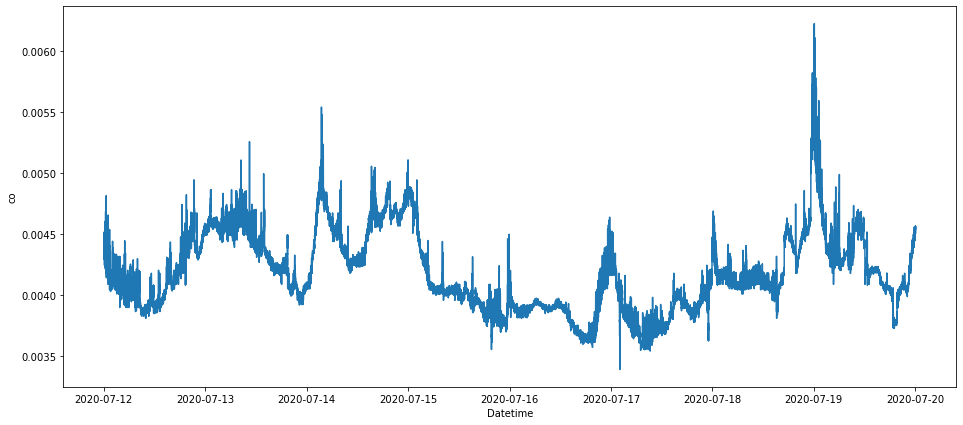

In [11]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Datetime')
ax1.set_ylabel('co')
ax1.plot(df3)


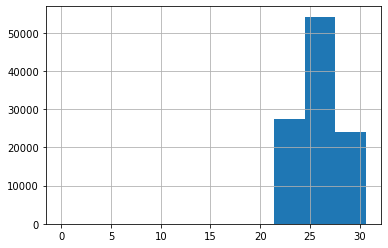

In [17]:


from matplotlib import pyplot

ts.hist()
pyplot.show()

In [ ]:
X = series2.values    # Airline passgengers dataset
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f\n' % (var1, var2))

X = series3.values    # Shampoo Sales dataset
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

In [53]:
from pandas import read_csv
#series = pd.read_excel(r'C:\Users\admin\Desktop\data from device2.xlsx', header=0, index_col=0)
X = df_temp
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=25.129723, mean2=25.968164
variance1=3.501620, variance2=4.806683


In [54]:
df_temp=pd.DataFrame(df, columns=['temp'])
df_temp=df_temp.astype(int)
df_temp
df_temp.describe()
#df_temp[52959.0]

,temp
count,105918.000000
mean,25.548944
std,2.080832
min,0.000000
25%,24.000000
50%,25.000000
75%,27.000000
max,30.000000


In [47]:
display(df_temp.dtypes)

temp    int32
dtype: object

In [56]:
df_humidity=pd.DataFrame(df, columns=['humidity'])
df_humidity=df_humidity.astype(int)
df_humidity
#df_humidity.describe()

,humidity
0,76
1,77
2,77
3,78
4,78
...,...
105913,75
105914,75
105915,75
105916,75


In [57]:
from pandas import read_csv
#series = pd.read_excel(r'C:\Users\admin\Desktop\data from device2.xlsx', header=0, index_col=0)
X = df_humidity
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=59.718669, mean2=63.210616
variance1=60.222581, variance2=93.774629


In [62]:
df_co=pd.DataFrame(df, columns=['co'])
#df_co=df_co.astype(int)
df_co
df_co.describe()

,co
count,105918.000000
mean,0.004183
std,0.000320
min,0.003391
25%,0.003931
50%,0.004089
75%,0.004391
max,0.006224


In [64]:
X = df_co
split = len(X) //2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=0.004293, mean2=0.004073
variance1=0.000000, variance2=0.000000
